In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

duration = 2.
sampling_frequency = 1024.

outdir = 'outdir'
label = 'eccentric_GW140914'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.
np.random.seed(150914)


In [ ]:
mass_1 = 9.0
mass_2 = 1.91
chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
tot_m = chirp_mass*(1+mass_ratio)**(6/5)/mass_ratio**(3/5)
print(chirp_mass,mass_ratio)
print(ff)
print(tot_m)

In [6]:
chirp_mass_ = 3.6
mass_ratio_ =  0.65
mass_1_ = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
mass_2_ = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)
print("mass_1 = {}, mass_2 = {}".format(mass_1_, mass_2_))

mass_1 = 5.152894794096871, mass_2 = 3.3493816161629657


In [2]:
# lal_taylorF2_fd(frequency_array, mass_1, mass_2, S1z, S2z, luminosity_distance, theta_jn, phase, **kwargs)
injection_parameters = dict(
    mass_1=23.5, mass_2=21.5, S1z=0.0, S2z=0.0, luminosity_distance=200.,
    theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1126259642.413, ra=45, dec=5.73)

waveform_arguments = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10.)



In [79]:
injection_parameters = dict(
    mass_1=23.5, mass_2=21.5, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1126259642.413, ra=45, dec=5.73)

waveform_arguments = dict(waveform_approximant='OSMFD',
                          reference_frequency=20., minimum_frequency=20.)



In [3]:
# Create the waveform_generator using the LAL eccentric black hole no spins
# source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

05:19 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
# Setting up three interferometers (LIGO-Hanford (H1), LIGO-Livingston (L1), and
# Virgo (V1)) at their design sensitivities. The maximum frequency is set just
# prior to the point at which the waveform model terminates. This is to avoid
# any biases introduced from using a sharply terminating waveform model.
minimum_frequency = 23.0
maximum_frequency = 107.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time']-2.0)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

05:19 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:19 bilby INFO    : Injected signal in H1:
05:19 bilby INFO    :   optimal SNR = 78.04
05:19 bilby INFO    :   matched filter SNR = 80.22+0.19j
05:19 bilby INFO    :   mass_1 = 23.5
05:19 bilby INFO    :   mass_2 = 21.5
05:19 bilby INFO    :   S1z = 0.0
05:19 bilby INFO    :   S2z = 0.0
05:19 bilby INFO    :   luminosity_distance = 200.0
05:19 bilby INFO    :   theta_jn = 0.4
05:19 bilby INFO    :   psi = 0.1
05:19 bilby INFO    :   phase = 1.2
05:19 bilby INFO    :   geocent_time = 1126259642.413
05:19 bilby INFO    :   ra = 45
05:19 bilby INFO    :   dec = 5.73
05:19 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:19 bilby INFO    : Injected signal in L1:
05:19 bilby INFO    :   optimal SNR = 93.04
05:19 bilby INFO    :   matched filter SNR = 94.99-2.93j
05:19 bilby INFO    :   mass_1 = 23.5
05:19 bilby INFO    :   mass_2 = 21.5
05:19 bilby INFO    :   S1z = 0.0
05:19 bi

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         7.13643838e-25-2.88876518e-24j, 6.49008319e-25-2.90049267e-24j,
         5.84236006e-25-2.91077674e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.87902627e-24-7.11237926e-25j, -2.89071422e-24-6.46820313e-25j,
         -2.90096362e-24-5.82266367e-25j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         7.13643838e-25-2.88876518e-24j, 6.49008319e-25-2.90049267e-24j,
         5.84236006e-25-2.91077674e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.87902627e-24-7.11237926e-25j, -2.89071422e-24-6.46820313e-25j,
         -2.90096362e-24-5.82266367e-25j])}]

05:20 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:20 bilby INFO    : Injected signal in H1:
05:20 bilby INFO    :   optimal SNR = 78.04
05:20 bilby INFO    :   matched filter SNR = 158.26+0.19j
05:20 bilby INFO    :   mass_1 = 23.5
05:20 bilby INFO    :   mass_2 = 21.5
05:20 bilby INFO    :   S1z = 0.0
05:20 bilby INFO    :   S2z = 0.0
05:20 bilby INFO    :   luminosity_distance = 200.0
05:20 bilby INFO    :   theta_jn = 0.4
05:20 bilby INFO    :   psi = 0.1
05:20 bilby INFO    :   phase = 1.2
05:20 bilby INFO    :   geocent_time = 1126259642.413
05:20 bilby INFO    :   ra = 45
05:20 bilby INFO    :   dec = 5.73
05:20 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:20 bilby INFO    : Injected signal in L1:
05:20 bilby INFO    :   optimal SNR = 93.04
05:20 bilby INFO    :   matched filter SNR = 188.04-2.93j
05:20 bilby INFO    :   mass_1 = 23.5
05:20 bilby INFO    :   mass_2 = 21.5
05:20 bilby INFO    :   S1z = 0.0
05:20 

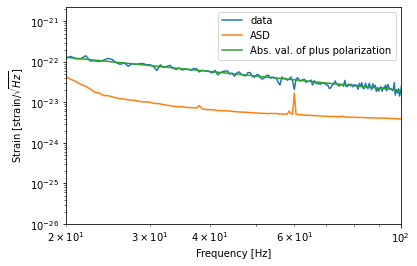

In [5]:
#to plot the frequency domain  
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''

ax.set_xlim(20.,100.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [83]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

95.70095340706085

In [23]:
'''injection_parameters = dict(
    mass_1=13.5, mass_2=11.5, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45, dec=5.73)'''
# chirp_mass=10.840041967173892, mass_ratio=0.8518518518518519
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.core.prior.Uniform(name='chirp_mass', minimum=5.0,maximum=20.0)
prior['mass_ratio'] = bilby.core.prior.Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['eccentricity'] = 0.1
prior["luminosity_distance"] = 200.0
prior["theta_jn"] = 0.4
prior["psi"] = 0.1
prior["phase"] = 1.2
prior["geocent_time"] = 1180002601.0

prior["ra"] = 45.0
prior["dec"] = 5.73

#this is to run the code faster
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior)


In [ ]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='short', label="eccn",
    nlive=500, dlogz=3.0, npool=8 )

03:27 bilby INFO    : Running for label 'eccn', output will be saved to 'short'
03:27 bilby INFO    : Using lal version 7.1.4.1
03:27 bilby INFO    : Using lal git version Branch: main;Tag: None;Id: dcd0a82f81f842e9ecfec960b579e67b70378bb9;;Builder: hemantakumar.phurailatpam <hemantaphurailatpam@gmail.com>;Repository status: UNCLEAN: Modified working tree
03:27 bilby INFO    : Using lalsimulation version 3.0.0.1
03:27 bilby INFO    : Using lalsimulation git version Branch: main;Tag: None;Id: dcd0a82f81f842e9ecfec960b579e67b70378bb9;;Builder: hemantakumar.phurailatpam <hemantaphurailatpam@gmail.com>;Repository status: UNCLEAN: Modified working tree
03:27 bilby INFO    : Search parameters:
03:27 bilby INFO    :   chirp_mass = Uniform(minimum=5.0, maximum=20.0, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
03:27 bilby INFO    :   mass_ratio = Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
03:27 bilby INFO    :  

0it [00:00, ?it/s]

03:27 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 8, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f212b14cbd0>>, 'dlogz': 3.0, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
03:27 bilby INFO    : Checkpoint every check_point_delta_t = 600s
03:27 bilby INFO    : Using dynesty version 1.0.1
03:27 bilby INFO    : Using the bil

In [ ]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '${HOME}/anaconda3/envs/lal/lib/python3.7/site-packages/lalsimulation/lib/python3.7/site-packages/lalsimulation')

In [1]:
import lalsimulation

In [6]:
import imp
imp.reload(lalsimulation)

<module 'lalsimulation' from '/home/hemantakumar.phurailatpam/anaconda3/envs/lal/lib/python3.7/site-packages/lalsimulation/__init__.py'>

In [2]:
lalsimulation.__file__

'/home/hemantakumar.phurailatpam/lalsuite-install/lib/python3.7/site-packages/lalsimulation/__init__.py'

In [3]:
lalsimulation.OSMFD

4

In [3]:
import lalsuite

ModuleNotFoundError: No module named 'lalsuite'

In [1]:
import bilby

ModuleNotFoundError: No module named 'bilby'

In [3]:
bilby.__file__

'/home/hemantakumar.phurailatpam/anaconda3/envs/lal/lib/python3.7/site-packages/bilby/__init__.py'

In [11]:
3.141592653589793238462643383279502884**2

9.869604401089358

In [124]:
import numpy as np

In [21]:
(C*C*C)/( G*(mass_1+mass_2)*Mo*M_PI*pow(6,3./2.) )

1.1666666666666667

In [126]:
np.pi*2

6.283185307179586